## Notebook 3B  - Mon/Tues
### Using logical tests, conditional statements (if, elif, else), and loops. Iteratively solving Newton's equations of motion using Euler's method.
### Total points: 6
#### PHYS 225 Intro to Computational Physics, Fall 2020

In [1]:
# import numpy and matplotlib so they can be used throughout notebook
import numpy as np
import matplotlib.pyplot as plt

## Review of the `type`, `len` and `size` functions 
You can use the `type()` function to figure out whether `u` and `v` are `np.ndarray`.

In [2]:
# quick example of checking the type of an object
a = [1,2,4]
b = np.array(a)  # create a numpy array based on the values in the list a

print( type(a) == str )  # print True if a is a string
print( type(a) == list ) # print True if a is a list

False
True


In [3]:
# compare data type of b
print(b)
print( type(b) == list) # b is an array, not a list, so this is false
print( type(b) == np.ndarray)

[1 2 4]
False
True


In Python there is a built-in `len` function which determines the length of a list. You can also take len() of a numpy ndarray but it only gives you the length of the first dimension, which matters if you've got a 2D array of values, such as a matrix.

In [4]:
b = np.array([-3,2.0, 4.5,4.1])

print( len(b) ) # len returns length of 1st dimension of array

4


Numpy also includes ways to get the number of elements in an array:  
1. Use `np.size()` function
1. use the size attribute. Every array has a "size" parameter which give the total number of elements in the array. If `b` is an array, then `b.size` give the same thing as `np.size(b)` 

If the array is 2D, it is product of row length and column length.

In [5]:
print( np.size(b) ) # call the size function on the array

print( b.size)  # access the size attribute of the array

4
4


Note that for a 1D array, both `len(b)` and `b.size` give the same result.

###  Task 1: Improve `angle_span` to check for incorrect data types as inputs (1 pt, autograded)
**Start by copy and pasting your solution for the `angle_span(u,v)`** function which you created in the previous assignment, PS3A.

**Function name:** `angle_span`

**Input parameters:** 
* `u` - a numpy array with three elements 
* `v` - a numpy array with three elements

**Returns:** (will vary depending if there is an error)
* `theta` - the angle **in degrees** between vectors u and v, if no errors are detected
* `"u or v is not type numpy.ndarray"` - error string if either `u` or `v` is not a numpy array
* `"u and v have different numbers of elements"` - error string if the input arrays have different numbers of elements

**You must match the output strings exactly!**

This exercise gives you an opportunity to apply the comparison operations, logical operators (`and` or `or`) and conditional commands  (`if`, `elif`, and `else`) from the prelab. 

In [6]:
"""
Define a function angle_span(u, v) that takes in two numpy arrays 
and calulates the angle between them. The function should check 
for incorrect inputs as described in Task 1. You must use the specified 
error strings.
"""
### BEGIN SOLUTION

def angle_span(u,v) :
    """ u and v are two numpy arrays of same length, treated as vectors
    """
    if type(u) != np.ndarray or type(v) != np.ndarray :
        return  "u or v is not type numpy.ndarray" 
    
    elif u.size != v.size :
        return "u and v have different numbers of elements"
    
    else :
        costheta = np.dot(u,v)/( np.linalg.norm(u) * np.linalg.norm(v) )
        theta = np.arccos(costheta)
        theta = np.degrees(theta)
        return theta

u1 = np.array([1,0])
u1 = [1,0,0]
u2 = np.array([-1,-1,-1])
print( angle_span(u1, u2))
    
### END SOLUTION

u or v is not type numpy.ndarray


In [27]:
u = np.array([2,5]); v = np.array([3, 3, 3]) # check if lengths differ
assert angle_span(u, v) == "u and v have different numbers of elements"

u = [2,5,-7]; v = np.array([3,3,3]) # check if types differ, but lengths are the same
assert angle_span(u, v) == "u or v is not type numpy.ndarray"

u = np.array([2,5,-7]); v = [3,3,3]  # check if types differ, but lengths are the same
assert angle_span(u, v) == "u or v is not type numpy.ndarray"

u = np.array([2, 5, -7]); v = np.array([3, 3, 3])  # check the numerical value
assert abs(angle_span(u, v) - 90)/90 < 1e-5 

AssertionError: 

## Review of a few things
* lists, and appending to lists
* creating lists of arrays.
* converting a list of arrays into a 2D array

#### Appending to lists

In [8]:
# Appending to a list
l = [1,2,3]
print(l)

l.append(4)  # this modifies the variable by appending
print(l)

[1, 2, 3]
[1, 2, 3, 4]


#### Creating a list of arrays by appending

In this example we have a series of position arrays with (x,y,z) coordinates. These are appended into a single list that records the vector position as the time evolves.

In [9]:
# Define a set of position vectors (numpy arrays) 
pos0 = np.array([1.0, 0.0, 2.0])   # x,y,z coordinates at time t0
pos1 = np.array([1.1, 0.1, 1.9])   # x,y,z coordinates at time t1
pos2 = np.array([1.2, 0.2, 1.8])   # x,y,z coordinates at time t2
pos3 = np.array([1.3, 0.3, 1.8])   # x,y,z coordinates at time t3

pos_list = []  # create an empty list

pos_list.append(pos0)   # add one more set of x,y,z coordinates to the list.
print( pos_list ) 

pos_list.append(pos1)   # add one more set of x,y,z coordinates to the list.
print( pos_list ) 

pos_list.append(pos2)  # add one more set of x,y,z coordinates to the list.
print( pos_list )

pos_list.append(pos3) # add one more set of x,y,z coordinates to the list.
print( pos_list )

[array([1., 0., 2.])]
[array([1., 0., 2.]), array([1.1, 0.1, 1.9])]
[array([1., 0., 2.]), array([1.1, 0.1, 1.9]), array([1.2, 0.2, 1.8])]
[array([1., 0., 2.]), array([1.1, 0.1, 1.9]), array([1.2, 0.2, 1.8]), array([1.3, 0.3, 1.8])]


#### Convert a list of arrays into a 2D numpy array

In the example below, we use the `array()` function to convert a list of numpy arrays into a 2D numpy array. 

Notice how each row represents a set of x, y, z coordinates at a particular time.  The 1st column is all the x-values. The 2nd column is all the y-values. The 3rd column is all the the z-values.

In [10]:
 # convert from list of numpy arrays to a 2D array
pos_array = np.array(pos_list) 
print(pos_array)

[[1.  0.  2. ]
 [1.1 0.1 1.9]
 [1.2 0.2 1.8]
 [1.3 0.3 1.8]]


In [11]:
# For plotting we need to select out just the x-values. There is a simple way to select a column or a row

In [12]:
xarray = pos_array[:, 0]  # the : picks all rows, 0 picks the 1st column (which are all the x-values)
yarray = pos_array[:, 1]  # y-values
zarray = pos_array[:, 2]  # z-values

print(xarray)
print(yarray)
print(zarray)

[1.  1.1 1.2 1.3]
[0.  0.1 0.2 0.3]
[2.  1.9 1.8 1.8]


Text(0, 0.5, 'y')

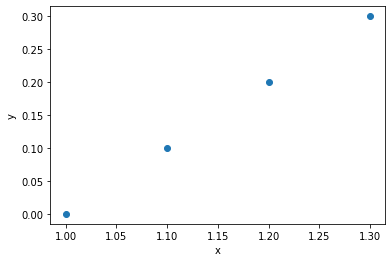

In [13]:
# example of how we could plot a trajectory in x-y plane using the 2D array pos_array
plt.plot(xarray, yarray, 'o');
plt.xlabel("x")
plt.ylabel("y")

## Example: Iteratively modeling the motion of a projectile

* Run the code below.
* Try adjusting the parameters like the initial conditions or `dt`
* Make sure each line of the code makes sense before moving on.

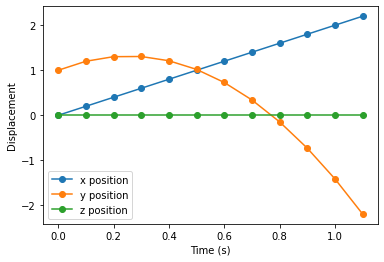

In [14]:
""" Calculate the trajectory under gravity"""

### SET INITIAL CONDITIONS and PARAMETERS
m = 1 # mass in kg
g = 9.8 # acceleration of gravity in m/s^2

t = 0 # intitial time
pos = np.array([0,1,0]) # define initial [x,y,z] position
vel = np.array([2,2,0]) # define initial velocity

force = m*np.array([0,-g,0]) # constant gravitational force in -y direction

dt = 0.1 # time step 

### CREATE EMPTY ARRAYS TO STORE TRAJECTORY
t_list = []  # makes a empty list to record the times
pos_list = [] # makes an empty list to record hte position

pos_list.append(pos)  # append the initial position to empty list
t_list.append(t)  # append the initial position to empty list

### ITERATIVELY CALCULATE TRAJECTORY USING EULER METHOD
while t < 1:  # loop until the time is equal or greater than one.
    acc = force/m
    pos = pos + vel*dt # update position
    vel = vel + acc*dt # update velocity
    t = t + dt  # increment the time
    
    pos_list.append(pos)  # append updated position to end of position list
    t_list.append(t)  # append updated time to end of time list
    
    
pos_array = np.array(pos_list)  # converts a list of position arrays to a 2D numpy array
t_array = np.array(t_list) # converts a list of times to a 1D array of times

### CREATE PLOTS USING CALCULATED TRAJECTORY
# plot all rows, 0th column to get x values
plt.plot(t_array, pos_array[:,0], 'o-', label="x position")  

# plot all rows, 1st column to get y values
plt.plot(t_array, pos_array[:,1], 'o-', label="y position")  

# plot all rows, 2nd column to get z values
plt.plot(t_array, pos_array[:,2], 'o-', label="z position")  

# Add the labels
plt.xlabel("Time (s)")
plt.ylabel("Displacement")
plt.legend()



# Task 2: Define a function `trajectory1( )` that computes the trajectory of an object (1 pt, auto)
Start by **copying and pasting the example code immediately above**, but adapt it so it works inside a function, `trajectory1`.

**Function name:** `trajectory1()`

**Input parameters:** 
* `pos0`, a numpy array that represent the initial position coordinates $x_0$, $y_0$, $z_0$ of object in meters
* `vel0`, a numpy array that represent the initial velocity of object in meters/s
* `m`, mass of object in kg
* `dt`, time step $\Delta t$ in seconds
* `tmax`, trajectory runs from $t = 0$ to $t_\textrm{max}$.

**Returns:**  
 a list `[t_array, pos_array]` where
 * `t_array` is a numpy array of time values
 * `pos_array` is a 2D numpy array with 3 columns (x,y,z) and N rows for each step in the simulation



In [15]:
"""
Define the trajectory1() function. 
An object (projectile) moves in a constant gravitational force field.
"""

### BEGIN SOLUTION
def trajectory1(pos0, vel0, m, dt, tmax) :

    g = 9.8 # acceleration due to gravity in m/s^2
    pos = pos0
    vel = vel0
    t = 0 # intitial time
    
    force = m*np.array([0,-g,0]) # constant gravitational force

    t_list = []  # makes a empty list to record the times
    pos_list = [] # makes an empty list to record hte position

    pos_list.append(pos)  # append the initial position to empty list
    t_list.append(t)  # append the initial position to empty list

    while t < tmax:  # loop until the time is equal or greater than one.
        acc = force/m
        pos = pos + vel*dt # update position
        vel = vel + acc*dt # update velocity
        t = t + dt  # increment the time
        pos_list.append(pos)  # append a new position to end of position list
        t_list.append(t)  # append a new time to end of time list
    
    pos_array = np.array(pos_list)  # converts a list of position arrays to a 2D numpy array
    t_array = np.array(t_list) # converts a list of times to a 1D array of times
    
    return [t_array, pos_array]

### END SOLUTION

#### Test cases for `Trajectory1()` function
Running the test case below should return a plot that looks like ![Trajectory in test for Task 2](trajectory1.png)
You should also pass all the tests.

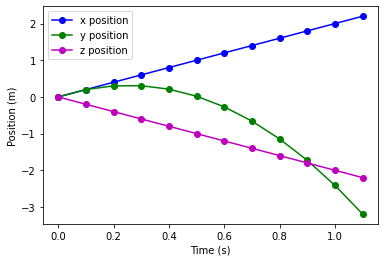

In [16]:
"""Check the trajectory1() function """

# Test plot for trajectory1()
pos0 = np.array([0,0,0]);  vel0 = np.array([2,2,-2]); m = 1; dt = 0.1; tmax = 1
t_array, pos_array = trajectory1(pos0, vel0 , m, dt, tmax) 
plt.plot(t_array, pos_array[:,0], 'bo-', label="x position")  # plot x vs t
plt.plot(t_array, pos_array[:,1], 'go-', label="y position")  # plot y vs t
plt.plot(t_array, pos_array[:,2], 'mo-', label="z position")  # plot z vs t
plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")

#check particular numerical values in the solution
assert type(t_array) == np.ndarray # check the data type
assert type(pos_array) == np.ndarray  # check the data type
assert len(t_array) == 12  # check the length of the time array
assert pos_array.shape == (12,3)  #check for 3 columns, 11 rows
assert abs(t_array[0] - 0) < 1e-5 # check initial condition
assert abs(t_array[6] - 0.6)/(0.6) < 1e-5 # check midpoint
assert abs(pos_array[8,0] - 1.6)/(1.6) < 1e-5  # check an x value
assert abs(pos_array[5,1] - 0.02)/(0.02) <1e-5  # check a y value
assert abs(pos_array.sum() - (-8.36))/abs(-8.36) < 1e-5 # check a z value

## Task 3: Define function `trajectory2()` that stops the `while` loop when object hits the ground (1 pt, auto)
Copy and paste your code for `trajectory1()` and then modify it so the loop stops when the ball hits the ground, which we will assume is the plane $y = 0$.

**Function name:** `trajectory2()`

**Input parameters:** 
* `pos0`, a numpy array that represent the initial position coordinates $x_0$, $y_0$, $z_0$ of object in meters
* `vel0`, a numpy array that represent the initial velocity of object in meters/s
* `m`, mass of object in kg
* `dt`, time step $\Delta t$


**Returns:**  
 a list `[t_array, pos_array]` where
 * `t_array` is a numpy array of time values
 * `pos_array` is a 2D numpy array with 3 columns (x,y,z) and N rows for each step in the simulation
 
### RULE YOU MUST FOLLOW: You only need to change 2 lines of code from `trajectory1()`!

In [17]:
"""
Define the trajectory2() function. The trajectory should stop when the ball hits the ground.
"""

### BEGIN SOLUTION
def trajectory2(pos0, vel0, m, dt) :

    g = 9.8 # acceleration due to gravity in m/s^2
    pos = pos0
    vel = vel0
    t = 0 # intitial time
    
    force = m*np.array([0,-g,0]) # constant gravitational force

    t_list = []  # makes a empty list to record the times
    pos_list = [] # makes an empty list to record hte position
    
    pos_list.append(pos)  # append the initial position to empty list
    t_list.append(t)  # append the initial position to empty list

    while pos[1] >= 0:  # run loop for positive heights (y-values), stop when hit ground
        acc = force/m
        pos = pos + vel*dt # update position
        vel = vel + acc*dt # update velocity
        t = t + dt  # increment the time
        pos_list.append(pos)  # append a new position to end of position list
        t_list.append(t)  # append a new time to end of time list
    
    pos_array = np.array(pos_list)  # converts a list of position arrays to a 2D numpy array
    t_array = np.array(t_list) # converts a list of times to a 1D array of times
    
    return [t_array, pos_array]

### END SOLUTION

#### Test cases for `Trajectory2()` function
Running the test case below should return a plot that shows the object starting at $y_0=2 \textrm{ m}$ high. The trajectory stops near $y=0$ at a position $x\approx6.8 \textrm{ m}$.
![Trajectory in test for Task 2](trajectory2.png)
You should also pass all the tests.

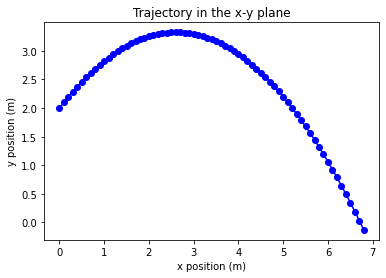

In [18]:
###### """Check the trajectory2() function """

# Test plot for trajectory2()
pos0 = np.array([0,2,0]);  vel0 = np.array([5,5,0]); m = 1; dt = 0.02
t_array, pos_array = trajectory2(pos0, vel0 , m, dt) 
plt.plot(pos_array[:,0], pos_array[:,1], 'bo-')  # plot x vs t
plt.title("Trajectory in the x-y plane")
plt.xlabel("x position (m)")
plt.ylabel("y position (m)")

#check particular numerical values in the solution
assert abs(len(t_array) - 68) < 2 # check the length of t_array
assert (np.max(pos_array[:,1]) - 3.326)/3.326 < 0.02  # check the highest point
assert (pos_array[-1,0] - 6.8)/6.8 < 0.02  # check the highest pointy

pos0 = np.array([0,-2,0]);  vel0 = np.array([5,5,0]); m = 1; dt = 0.02
t_array, pos_array = trajectory2(pos0, vel0 , m, dt) 
assert len(t_array) == 1

# Tasks 4-6  - Calculating trajectories using Newton's Universal Gravitational Force

# Task 4: Define the gravitational force function `F_grav_vec()` (1 pt, auto)
   
This task requires you to copy and paste your code from the previous lab, PS3A.  Make sure to use the one that inputs vectors and returns vectors.

In [19]:
"""
Define the function F_grav_vec() which can be used to compute the graviational force
pos1, numpy array of positions (x1,y1,z1) in meters
pos2, numpy array of positions (x2,y2,z2) in meters
m1, m2, masses in kg
"""
from scipy.constants import G # import gravitational constant 

### BEGIN SOLUTION
def F_grav_vec(pos1, pos2, m1, m2) :
    r = np.linalg.norm(pos2-pos1)
    F_mag = G*m1*m2/r**2
    r_unit = (pos2-pos1)/r
    F_grav = -F_mag*r_unit
    return F_grav

pos1 = np.array([0,0,0]); pos2 = np.array([1,0,0])
print(F_grav_vec(pos1,pos2, m1=70, m2=100))
print(F_grav_vec(pos1,pos2, m1=100, m2=70)) 
print(F_grav_vec(pos1+4,pos2+4, m1=100, m2=70))
print(F_grav_vec(10*(pos1+4),10*(pos2+4), m1=100, m2=70))  
### END SOLUTION

[-4.67201e-07 -0.00000e+00 -0.00000e+00]
[-4.67201e-07 -0.00000e+00 -0.00000e+00]
[-4.67201e-07 -0.00000e+00 -0.00000e+00]
[-4.67201e-09 -0.00000e+00 -0.00000e+00]


In [20]:
## """Check the F_grav_vec against test cases (same situations as for F_grav1)"""

def vector_error(studentvec, instructorvec) :
    error = np.linalg.norm(studentvec - instructorvec)/np.linalg.norm(instructorvec)
    return error
    

# force between two people shoudl be less than a micronewton.
pos1 = np.array([0,0,0]); pos2 = np.array([1,0,0])
studentresult = F_grav_vec(pos1,pos2, m1=70, m2=100)
assert type(studentresult) == np.ndarray  # check datatype of students' result

instructorresult = np.array( [-4.67201e-07, -0.0, -0.0] )
assert vector_error(studentresult, instructorresult ) < 1e-4

# revese m1 and m2 values
studentresult = F_grav_vec(pos1,pos2, m1=100, m2=70)
instructorresult = [-4.67201e-07, -0.0, -0.0]
assert vector_error(studentresult, instructorresult ) < 1e-4

# shift positions of both masses by equal amounts
studentresult = F_grav_vec(pos1+4,pos2+4, m1=100, m2=70)
instructorresult = [-4.67201e-07, -0.0, -0.0]
assert vector_error(studentresult, instructorresult ) < 1e-4

# move masses 10x farther apart
studentresult = np.array(F_grav_vec(10*(pos1+4),10*(pos2+4), m1=100, m2=70))
instructorresult = [-4.67201e-09, -0.0, -0.0]
assert vector_error(studentresult, instructorresult ) < 1e-4

del vector_error, studentresult, instructorresult

## Task 5: Pencil and paper diagram and calculation

1. Draw a diagram of the whole earth and a projectile that is launched from the earth's surface.
1. Draw an $xyz$ coordinate system on the surface of the earth that matches the coordinate system used in the `trajectory1` function. 
1. Draw the position vectors for the projectile ($m_2$) and the center of earth ($m_1$). 
1. Write out the position vector (including numbers) for the center of the earth? 

**Insert your diagram in the cell below.**

## Task 6: Define a function `trajectory4()` that replaces a constant gravitational force $-mg\hat{y}$ with a variable force calculated using `F_grav_vec()` (1 pt, autograded)
Copy and paste your code for `trajectory1()` and then modify it so the acceleration is computed by calling `F_grav_vec()`, which uses Newton's universal gravitation formula. 

**Function name:** `trajectory4()`

**Input parameters:** 
* `pos0`, a numpy array that represent the initial position coordinates $x_0$, $y_0$, $z_0$ of object in meters. `pos0` is *relative to the surface of the earth*, not the center.
* `vel0`, a numpy array that represent the initial velocity of object in meters/s
* `m`, mass of object in kg
* `dt`, time step $\Delta t$
* `tmax`, simulation runs from $t = 0$ to $t = t_{\textrm{max}}$ 

**Returns:**  
 a list `[t_array, pos_array]` where
 * `t_array` is a numpy array of time values
 * `pos_array` is a 2D numpy array with 3 columns (x,y,z) and N rows for each step in the simulation
 
**Hint:** A Solution is possible by adding, deleting, or modifying just 3 lines

**Discuss with instructor or TA:** Should the calculation of `F_grav_vec` happen inside or outside of the loop? What difference does it make?

In [21]:
"""
Define the trajectory4() function. Replace the constant gravitational acceleration with Newton's Universal Gravitation
The object should not bounce.
"""

R_earth = 6.371e6  # Radius of earth in meters
m_earth = 5.972e24 # mass of earth in kg


### BEGIN SOLUTION
def trajectory4(pos0, vel0, m, dt, tmax) :

    pos_earth_center = np.array([0,-R_earth,0])
       
    pos = pos0 
    vel = vel0
    t = 0 # intitial time
    
    #force = m*np.array([0,-9.8,0]) # constant gravitational force

    t_list = []  # makes a empty list to record the times
    pos_list = [] # makes an empty list to record hte position
    
    t_list.append(t)
    pos_list.append(pos)
                   
    while t < tmax:  # run loop for positive heights (y-values), stop when hit ground
        force = F_grav_vec(pos_earth_center, pos, m_earth, m)
        acc = force/m
        #print(acc)
        pos = pos + vel*dt # update position
        vel = vel + acc*dt # update velocity
        t = t + dt  # increment the time
        pos_list.append(pos)  # append a new position to end of position list
        t_list.append(t)  # append a new time to end of time list
    
    pos_array = np.array(pos_list)  # converts a list of position arrays to a 2D numpy array
    t_array = np.array(t_list) # converts a list of times to a 1D array of times
    
    return [t_array, pos_array]

### END SOLUTION

#### Test cases for `Trajectory4()` function
The `trajectory4()` function should produce nearly identical results to the `trajectory1()` function. The graphs of trajectories modeled by the two functions should look like they overlap perfectly.
![Trajectory in test for Task 5](trajectory4.png)
You should also pass all the tests.

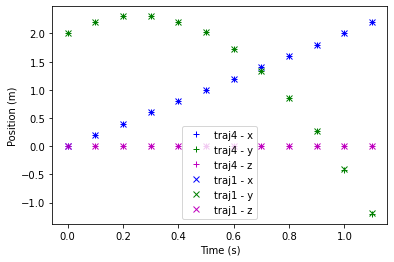

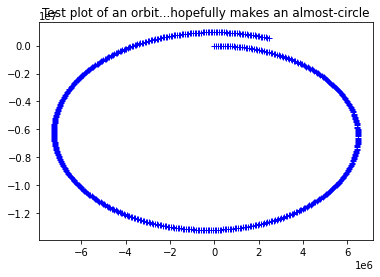

In [23]:
"""Check the trajectory4() function """

# Test plot for trajectory4()
pos0 = np.array([0,2,0]);  vel0 = np.array([2,2,0]); m = 1; dt = 0.1; tmax = 1
t_array4, pos_array4 = trajectory4(pos0, vel0 , m, dt, tmax) 
plt.plot(t_array4, pos_array4[:,0], 'b+', label="traj4 - x")  # plot x vs t
plt.plot(t_array4, pos_array4[:,1], 'g+', label="traj4 - y")  # plot y vs t
plt.plot(t_array4, pos_array4[:,2], 'm+', label="traj4 - z")  # plot z vs t

# Test plot for trajectory1()
pos0 = np.array([0,2,0]);  vel0 = np.array([2,2,0]); m = 1; dt = 0.1; tmax = 1
t_array1, pos_array1 = trajectory1(pos0, vel0 , m, dt, tmax) 
plt.plot(t_array1, pos_array1[:,0], 'bx', label="traj1 - x")  # plot x vs t
plt.plot(t_array1, pos_array1[:,1], 'gx', label="traj1 - y")  # plot y vs t
plt.plot(t_array1, pos_array1[:,2], 'mx', label="traj1 - z")  # plot z vs t

plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")

#check particular numerical values in the solution
assert len(t_array1) == 12  # check the length of the time array
assert pos_array1.shape == (12,3)  #check for 3 columns, 11 rows
assert abs(np.sum(pos_array4[:,1] - pos_array1[:,1])) < 0.1


# Test plot for trajectory4() for orbits
R_earth = 6.371e6; g = 9.8
pos0 = np.array([0,2,0]);  vel0 = np.array([(g*R_earth)**0.5,0,0]); m = 1; dt = 10; tmax = 6000

plt.figure()
plt.title("Test plot of an orbit...hopefully makes an almost-circle")
t_array4, pos_array4 = trajectory4(pos0, vel0 , m, dt, tmax) 
plt.plot(pos_array4[:,0],pos_array4[:,1] , 'b+', label="traj4 - x")  # plot x vs t

# Task 7: Define function `trajectory3()` that bounces up elastically after object  hits the ground (ungraded, time permitting)
Copy and paste your code for `trajectory1()` and then modify it so the loop stops at a time $t_\textrm{max}$. Also, the ball should bounce up after it hits the ground, which we will assume is the plane $y = 0$. 

**Function name:** `trajectory3()`

**Inputs:** 
* `pos0`, a numpy array that represent the initial position coordinates $x_0$, $y_0$, $z_0$ of object in meters
* `vel0`, a numpy array that represent the initial velocity of object in meters/s
* `m`, mass of object in kg
* `dt`, time step $\Delta t$
* `tmax`, simulation runs from $t = 0$ to $t = t_{\textrm{max}}$ 

**Outputs:**  
 a list `[t_array, pos_array]` where
 * `t_array` is a numpy array of time values
 * `pos_array` is a 2D numpy array with 3 columns (x,y,z) and N rows for each step in the simulation
 
### HINT: You can implement the bounce by adding 2 lines of code.

In [24]:
"""
Define the trajectory3() function. The object should bounce when the ball hits the ground.
"""

### BEGIN SOLUTION
def trajectory3(pos0, vel0, m, dt, tmax) :

    g = 9.8 # acceleration due to gravity in m/s^2
    pos = pos0
    vel = vel0
    t = 0 # intitial time
    
    force = m*np.array([0,-g,0]) # constant gravitational force

    t_list = []  # makes a empty list to record the times
    pos_list = [] # makes an empty list to record hte position
    pos_list.append(pos)  # append the initial position to empty list
    t_list.append(t)  # append the initial position to empty list
    
    while t < tmax:  # run loop for positive heights (y-values), stop when hit ground
        acc = force/m
        pos = pos + vel*dt # update position
        vel = vel + acc*dt # update velocity
        if pos[1] < 0 :
            vel[1] = -vel[1]
        t = t + dt  # increment the time
        pos_list.append(pos)  # append a new position to end of position list
        t_list.append(t)  # append a new time to end of time list
    
    pos_array = np.array(pos_list)  # converts a list of position arrays to a 2D numpy array
    t_array = np.array(t_list) # converts a list of times to a 1D array of times
    
    return [t_array, pos_array]

### END SOLUTION

#### Test cases for `Trajectory3()` function
Running the test case below should return a plot that shows object always moving to the right, but bouncing when it hits the ground. The trajectory stops shortly after 3 bounces at a position $x\approx 25 \textrm{ m}$.
![Trajectory in test for Task 4](trajectory3.png)
You should also pass all the tests.

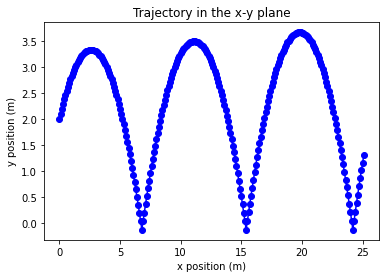

In [25]:
"""Check the trajectory3() function """

# Test plot for trajectory3()
pos0 = np.array([0,2,0]);  vel0 = np.array([5,5,0]); m = 1; dt = 0.02; tmax = 5
t_array, pos_array = trajectory3(pos0, vel0 , m, dt, tmax) 
plt.plot(pos_array[:,0], pos_array[:,1], 'bo-')  # plot x vs t
plt.title("Trajectory in the x-y plane")
plt.xlabel("x position (m)")
plt.ylabel("y position (m)")


#check particular numerical values in the solution
assert abs(len(t_array) - 252) < 2 # check the length of t_array
assert (np.max(pos_array[:50,1]) - 3.326)/3.326 < 0.02  # check the highest point
assert (pos_array[-1,0] - 25.1)/25.1 < 0.02  # check the highest point
assert (t_array[-1] - 5.02) < 0.21  # check the length of the time array

# Task 8: Test `trajectory3()` "bouncy" function for negative initial height (ungraded, time permitting)

1. Run the code below with the initial height of $y_0 = -2 \textrm{ m}$, $v_{0,x} = 5 \textrm{ m/s}$, $v_{0,y} = 5 \textrm{ m/s}$, $dt = 0.1 \textrm{ s}$, and $t_\textrm{max} = 5 \textrm{ s}$.
1. Explain the behavior of the plot. Why does this happen? 

Put your explanation in the Markdown cell that says "YOUR ANSWER HERE".

Text(0, 0.5, 'y (m)')

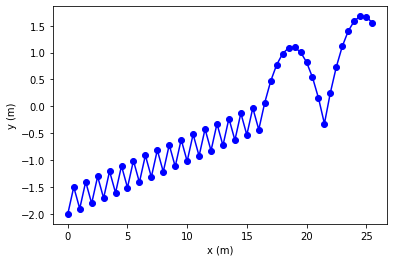

In [26]:
pos0 = np.array([0,-2,0]);  vel0 = np.array([5,5,0]); m = 1; dt = 0.1; tmax = 5
t_array, pos_array = trajectory3(pos0, vel0 , m, dt, tmax) 
plt.figure()
plt.plot(pos_array[:,0], pos_array[:,1], 'bo-')  # plot x vs t
plt.xlabel("x (m)")
plt.ylabel("y (m)")